# Data Scientist Salaries

In [85]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set_theme()
sns.set(rc={"figure.figsize":(10,6),"figure.dpi":300})
dSalaries = pd.read_csv("ds_salaries.csv")
df= dSalaries.copy()

In [13]:
df.describe().T

count           mean            std     min       25%  \
work_year      3755.0    2022.373635       0.691448  2020.0    2022.0   
salary         3755.0  190695.571771  671676.500508  6000.0  100000.0   
salary_in_usd  3755.0  137570.389880   63055.625278  5132.0   95000.0   
remote_ratio   3755.0      46.271638      48.589050     0.0       0.0   

                    50%       75%         max  
work_year        2022.0    2023.0      2023.0  
salary         138000.0  180000.0  30400000.0  
salary_in_usd  135000.0  175000.0    450000.0  
remote_ratio        0.0     100.0       100.0

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [59]:
df.head()

work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  
0               ES            L  
1               US            S  
2               US            S  
3               CA            M  
4               CA            M

In [60]:
df.isnull().values.any()

False

In [61]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [62]:
df.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [63]:
df["work_year"].value_counts()

2023    1785
2022    1664
2021     230
2020      76
Name: work_year, dtype: int64

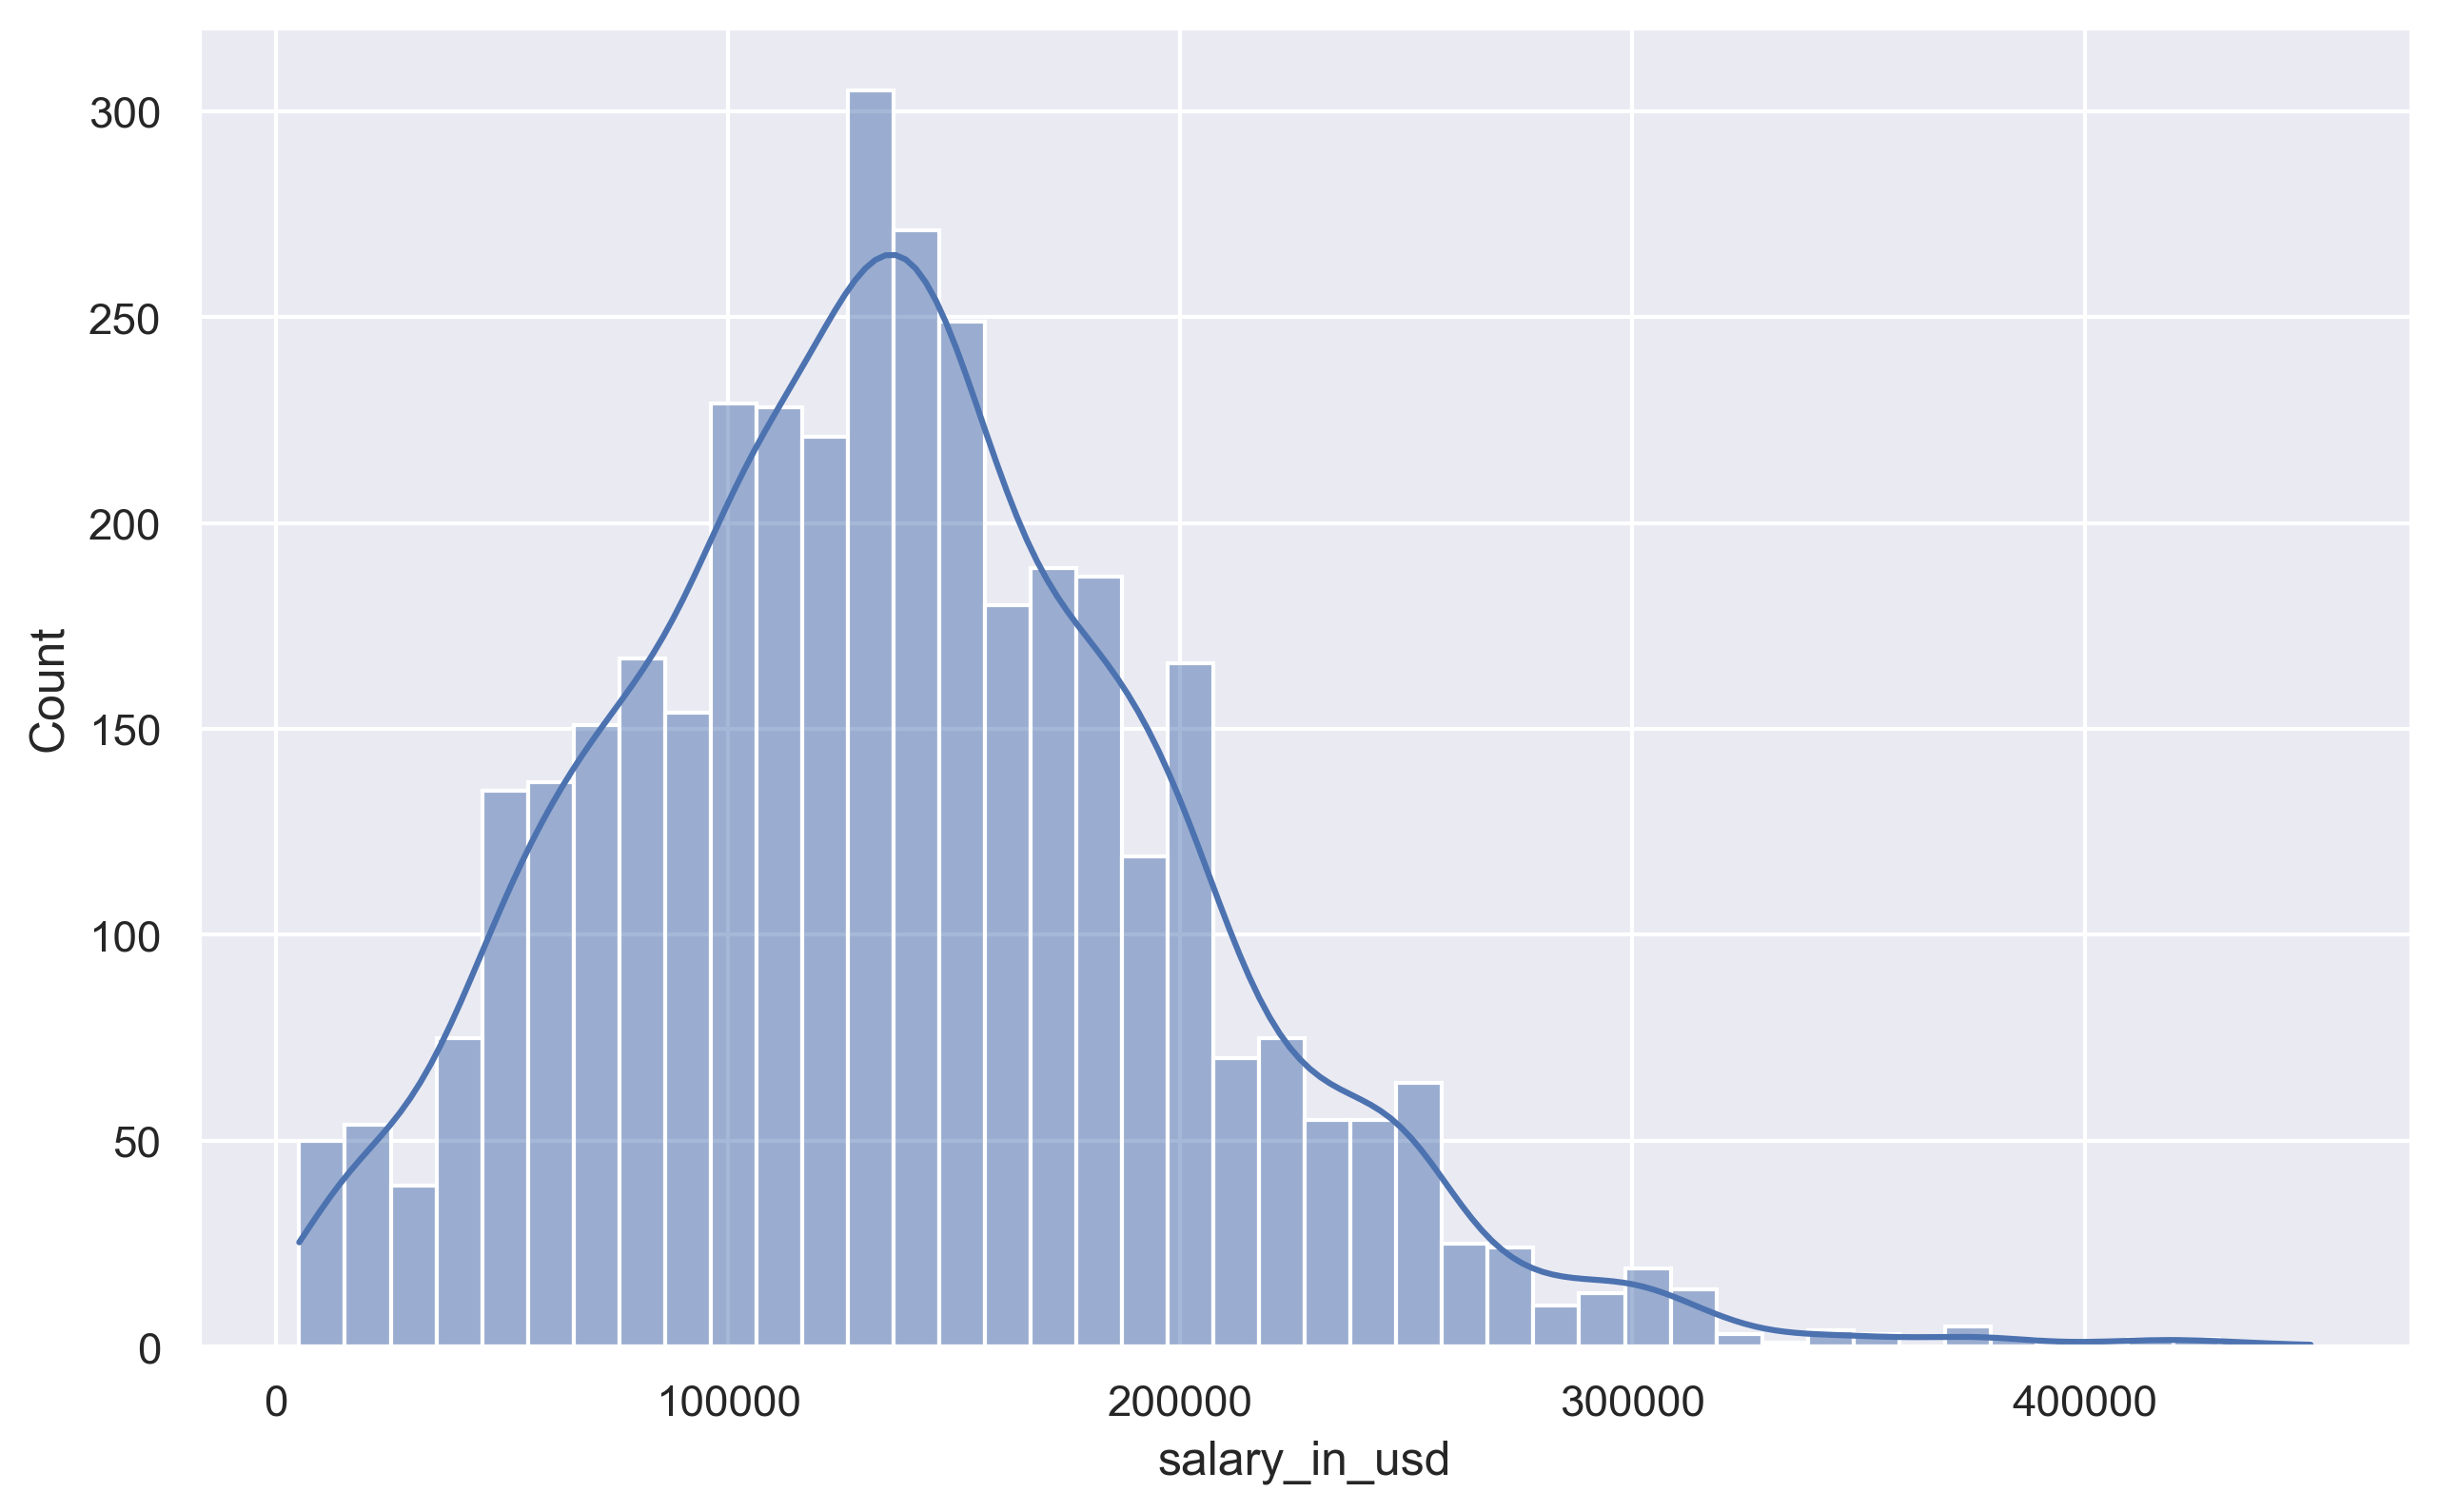

In [64]:
sns.histplot(df.salary_in_usd,kde =True);

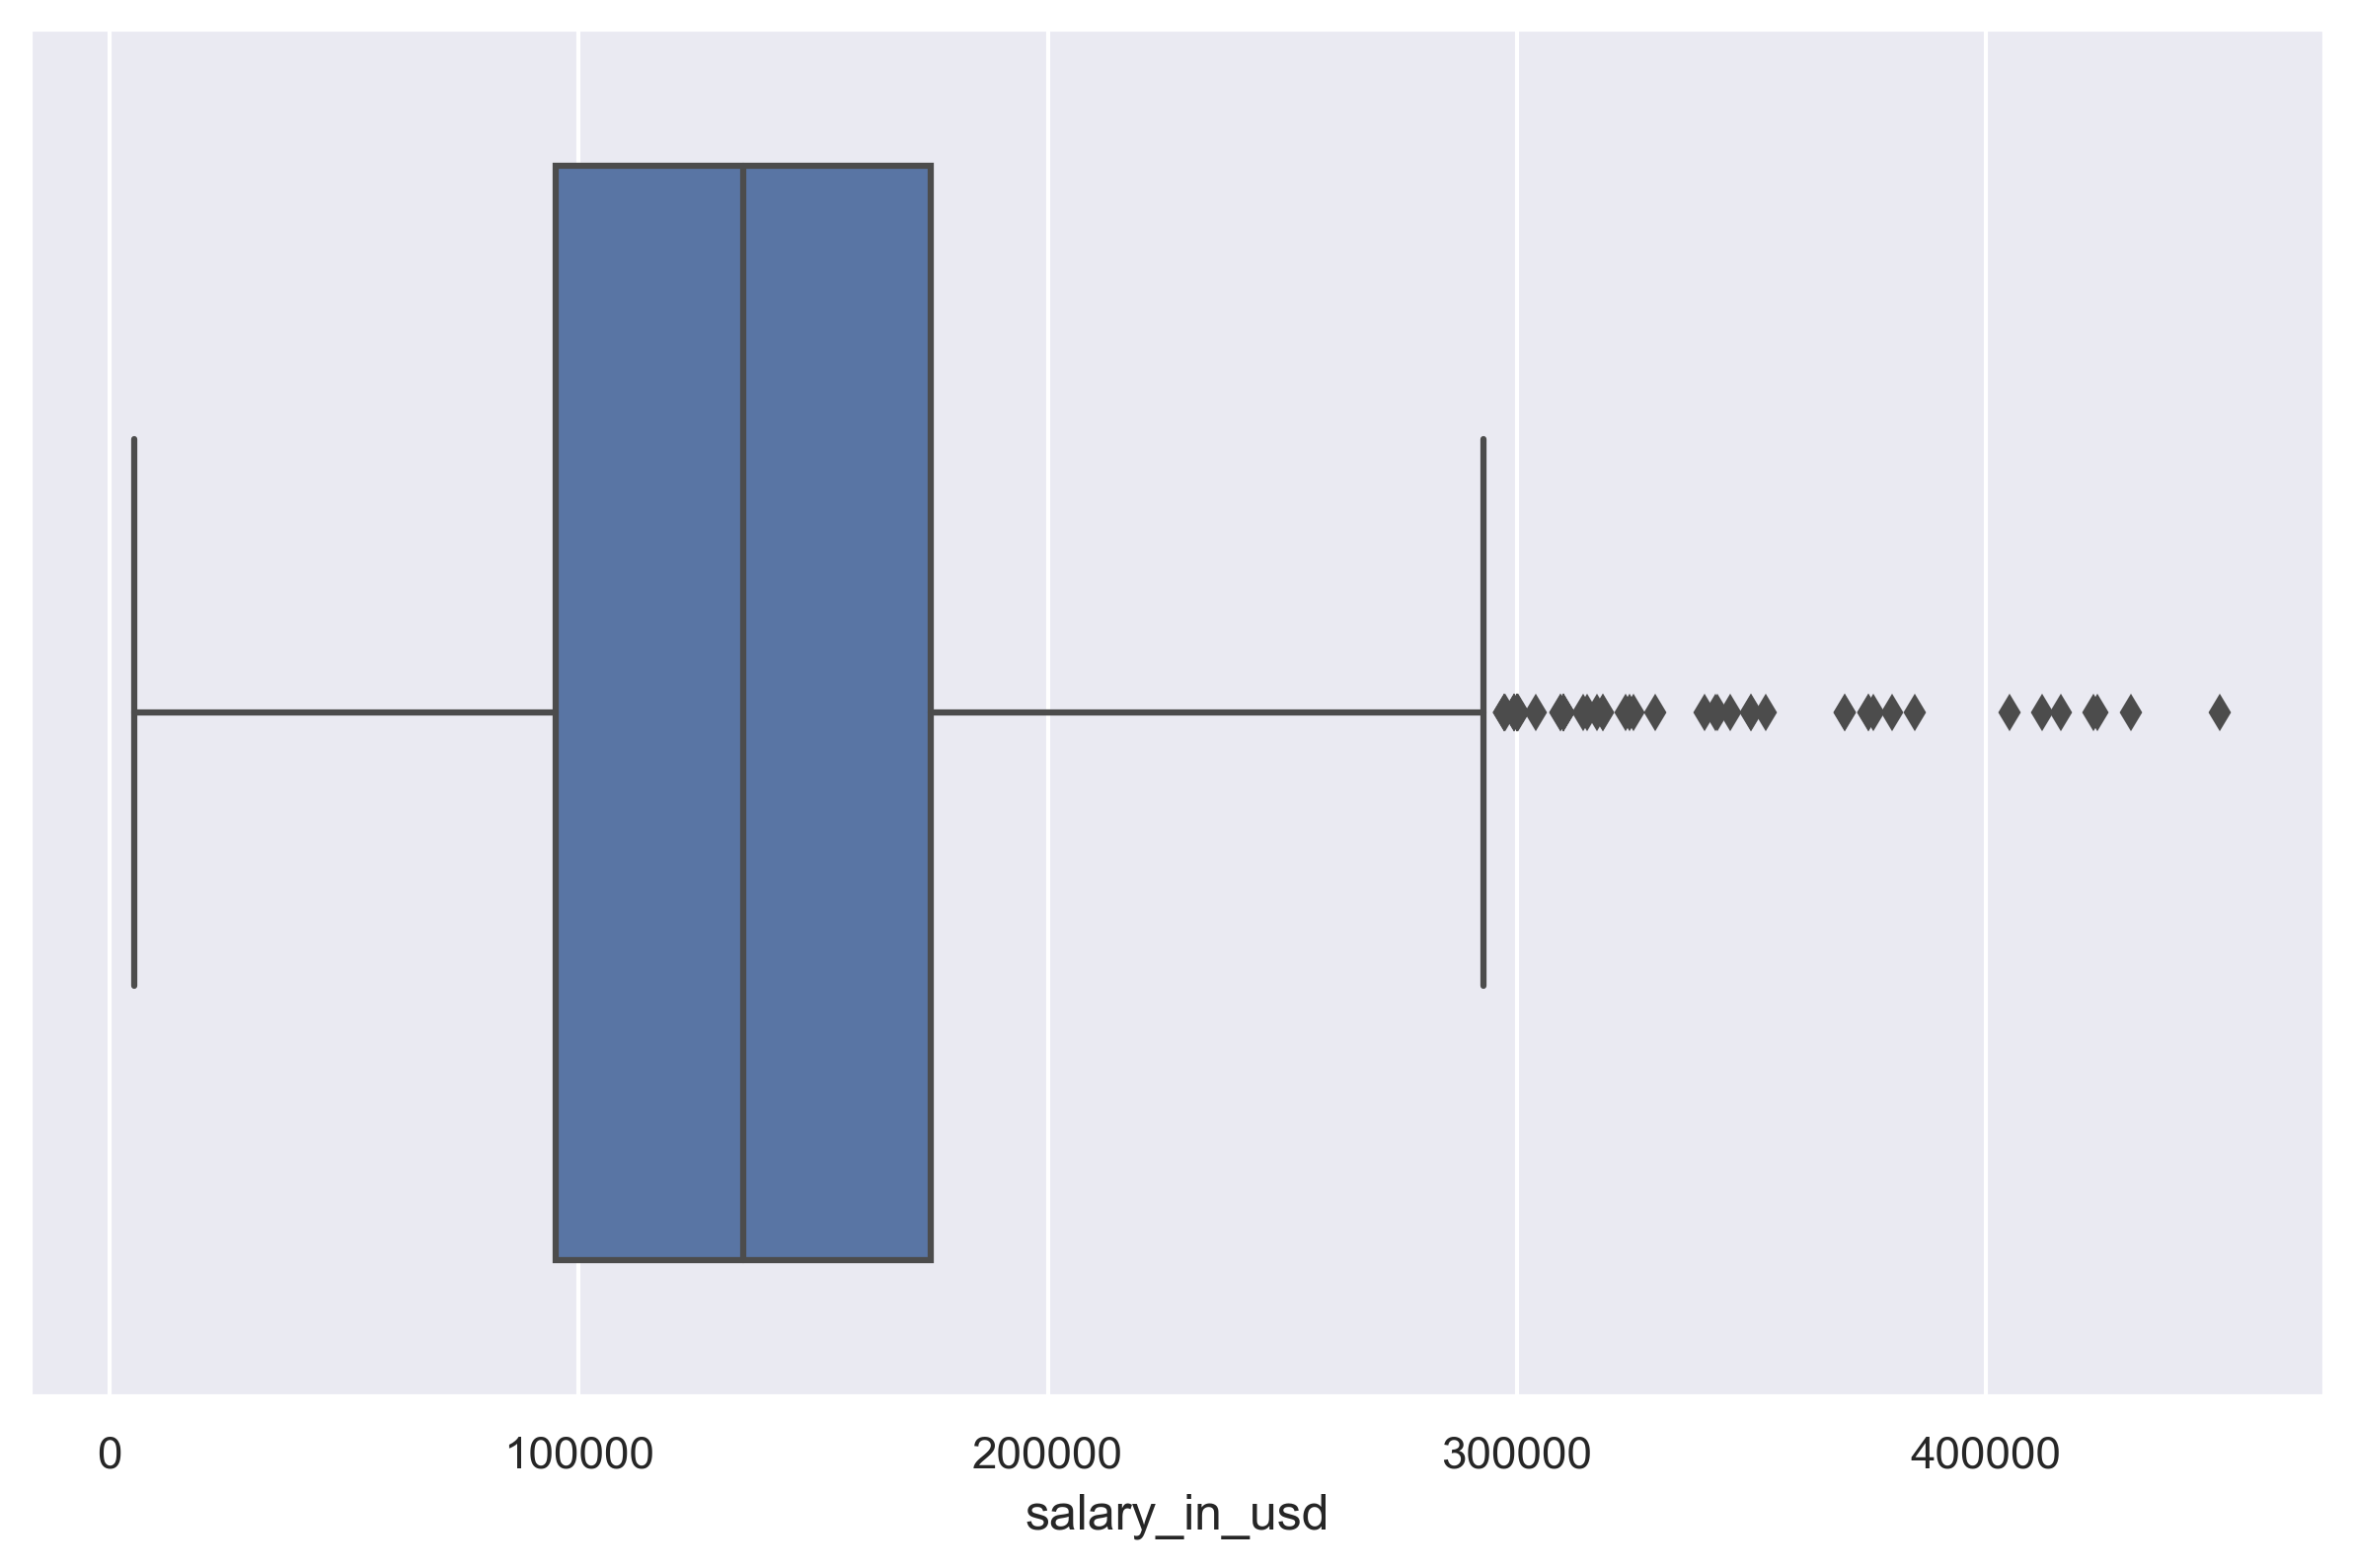

In [65]:
sns.boxplot(x=df["salary_in_usd"]);

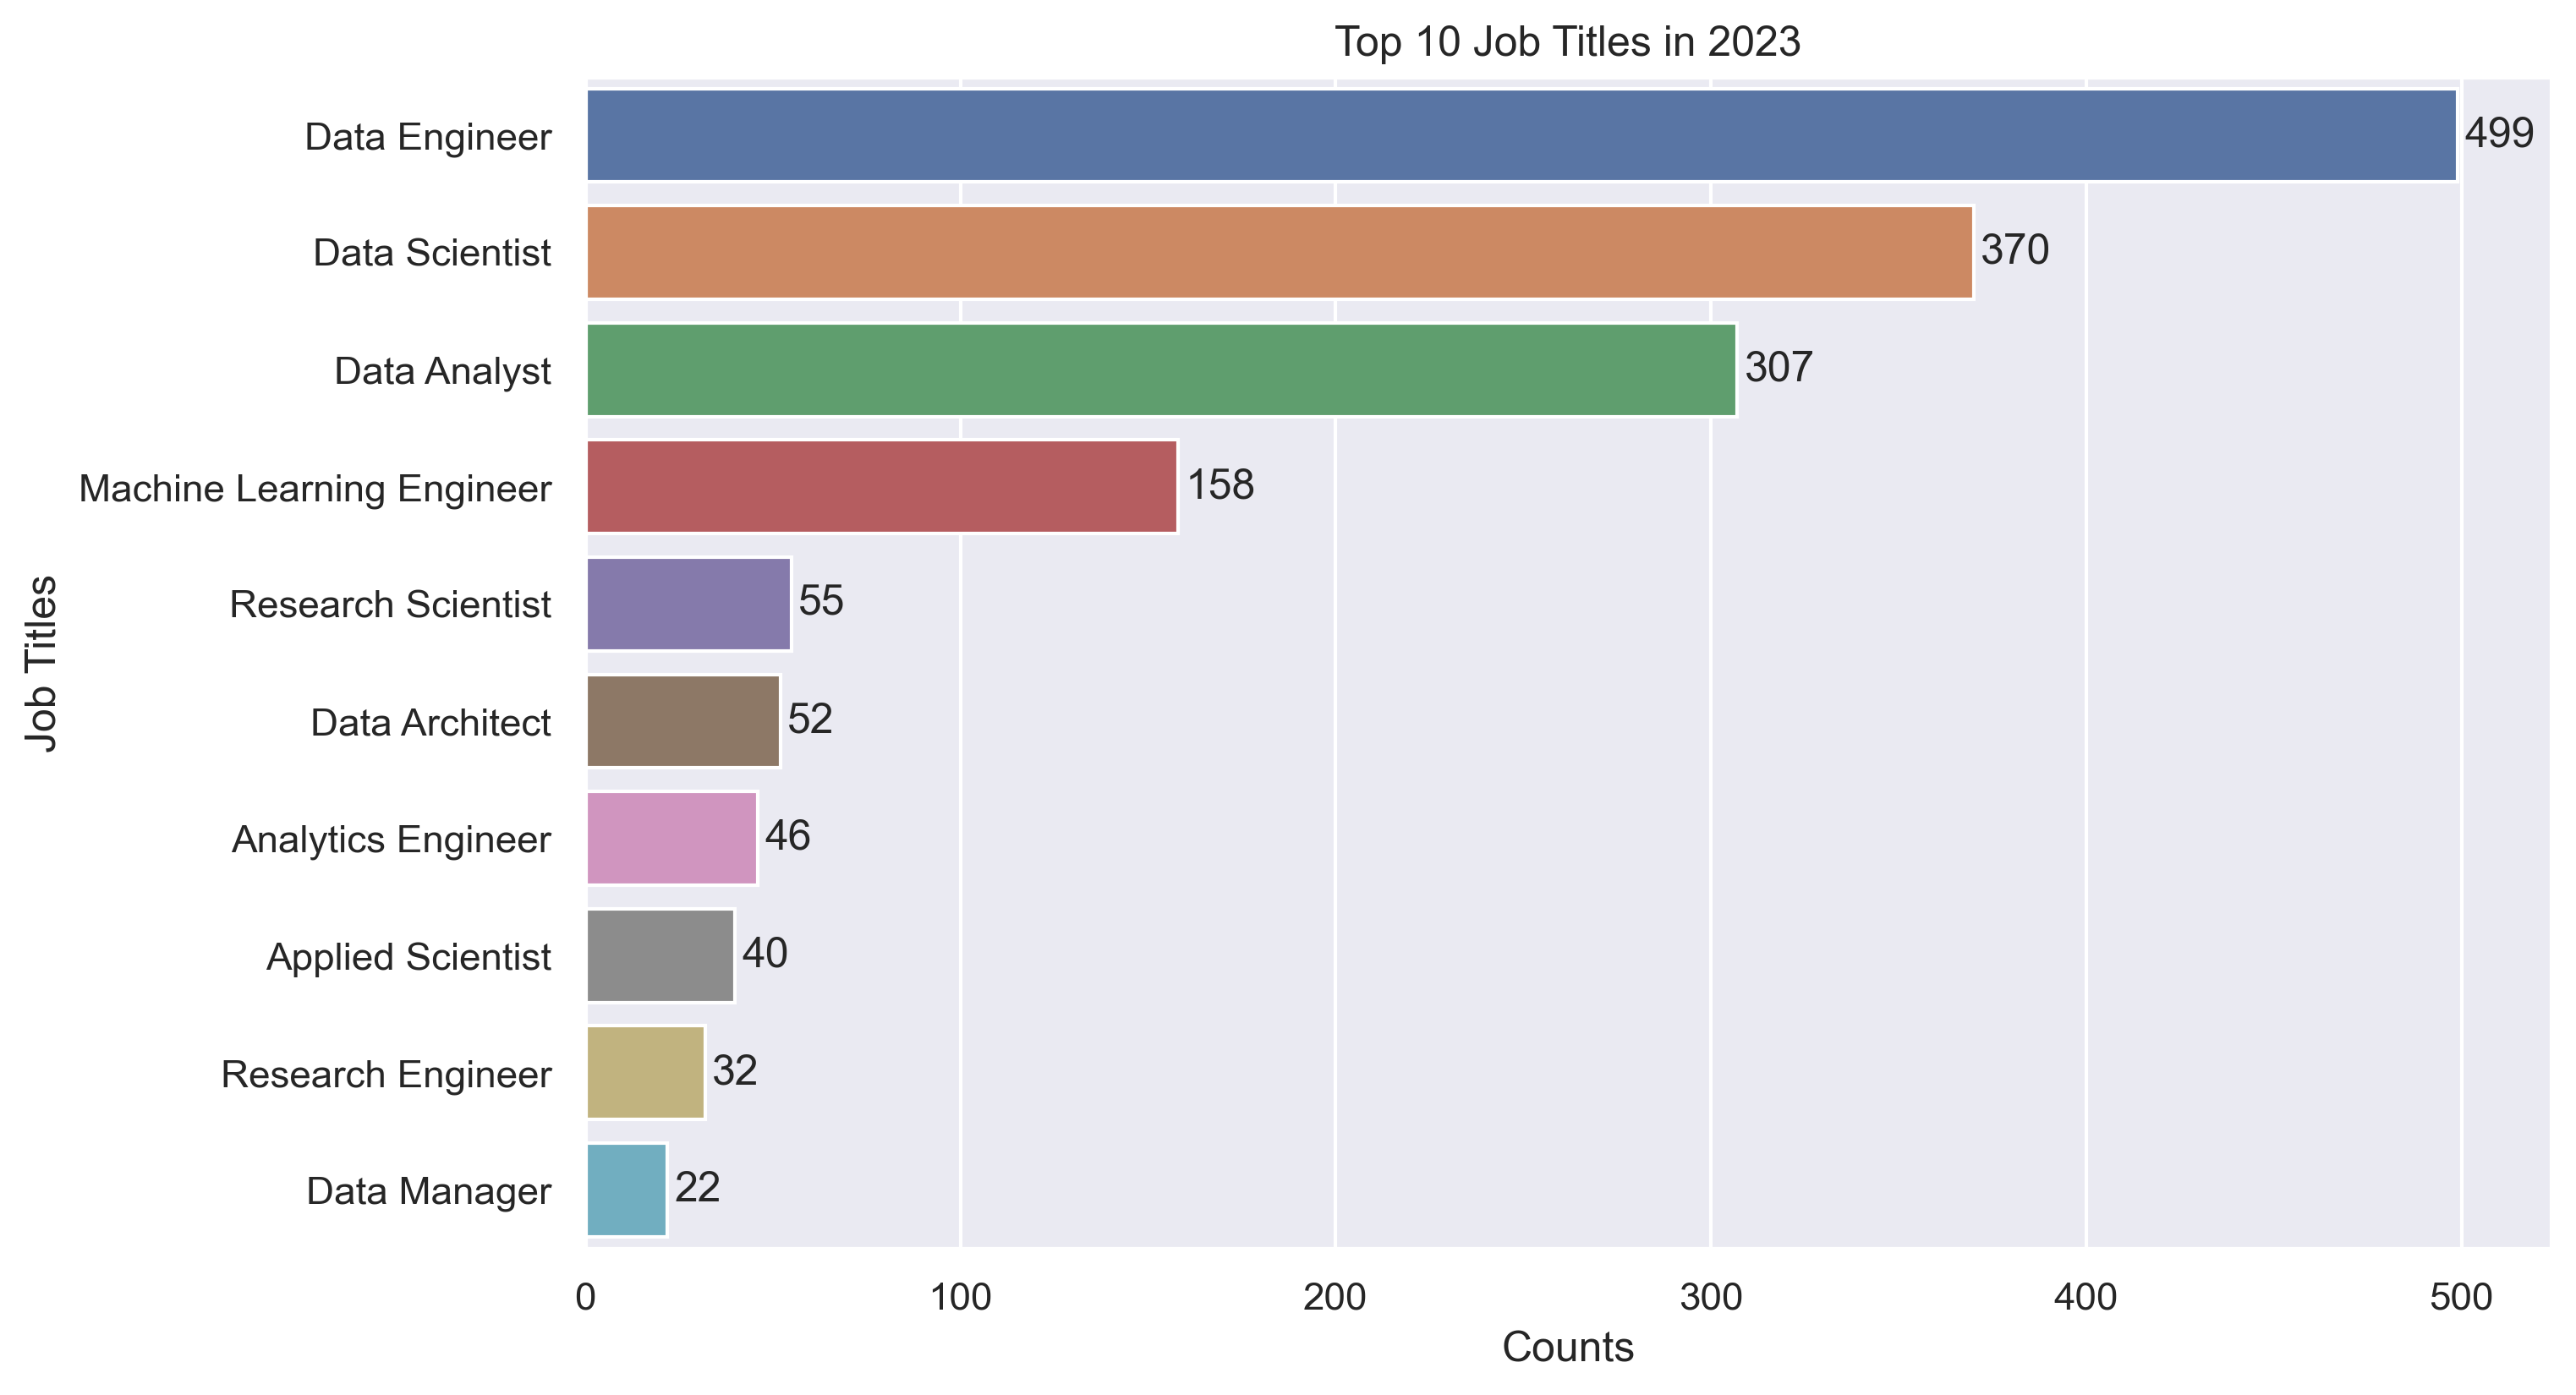

In [66]:
jobs=df[df["work_year"]==2023]["job_title"].value_counts().nlargest(10).reset_index()
fig,ax = plt.subplots()
ax = sns.barplot(ax=ax,data=df,y=jobs["index"],x=jobs.job_title)
ax.set(ylabel="Job Titles",xlabel="Counts",title="Top 10 Job Titles in 2023")
ax.bar_label(ax.containers[0],padding=2);

In [67]:
df["experience_level"].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [68]:
df["experience_level"] = df["experience_level"].replace("EN","Junior")
df["experience_level"] = df["experience_level"].replace("MI","Mid-level")
df["experience_level"] = df["experience_level"].replace("SE","Senior")
df["experience_level"] = df["experience_level"].replace("EX","Director")

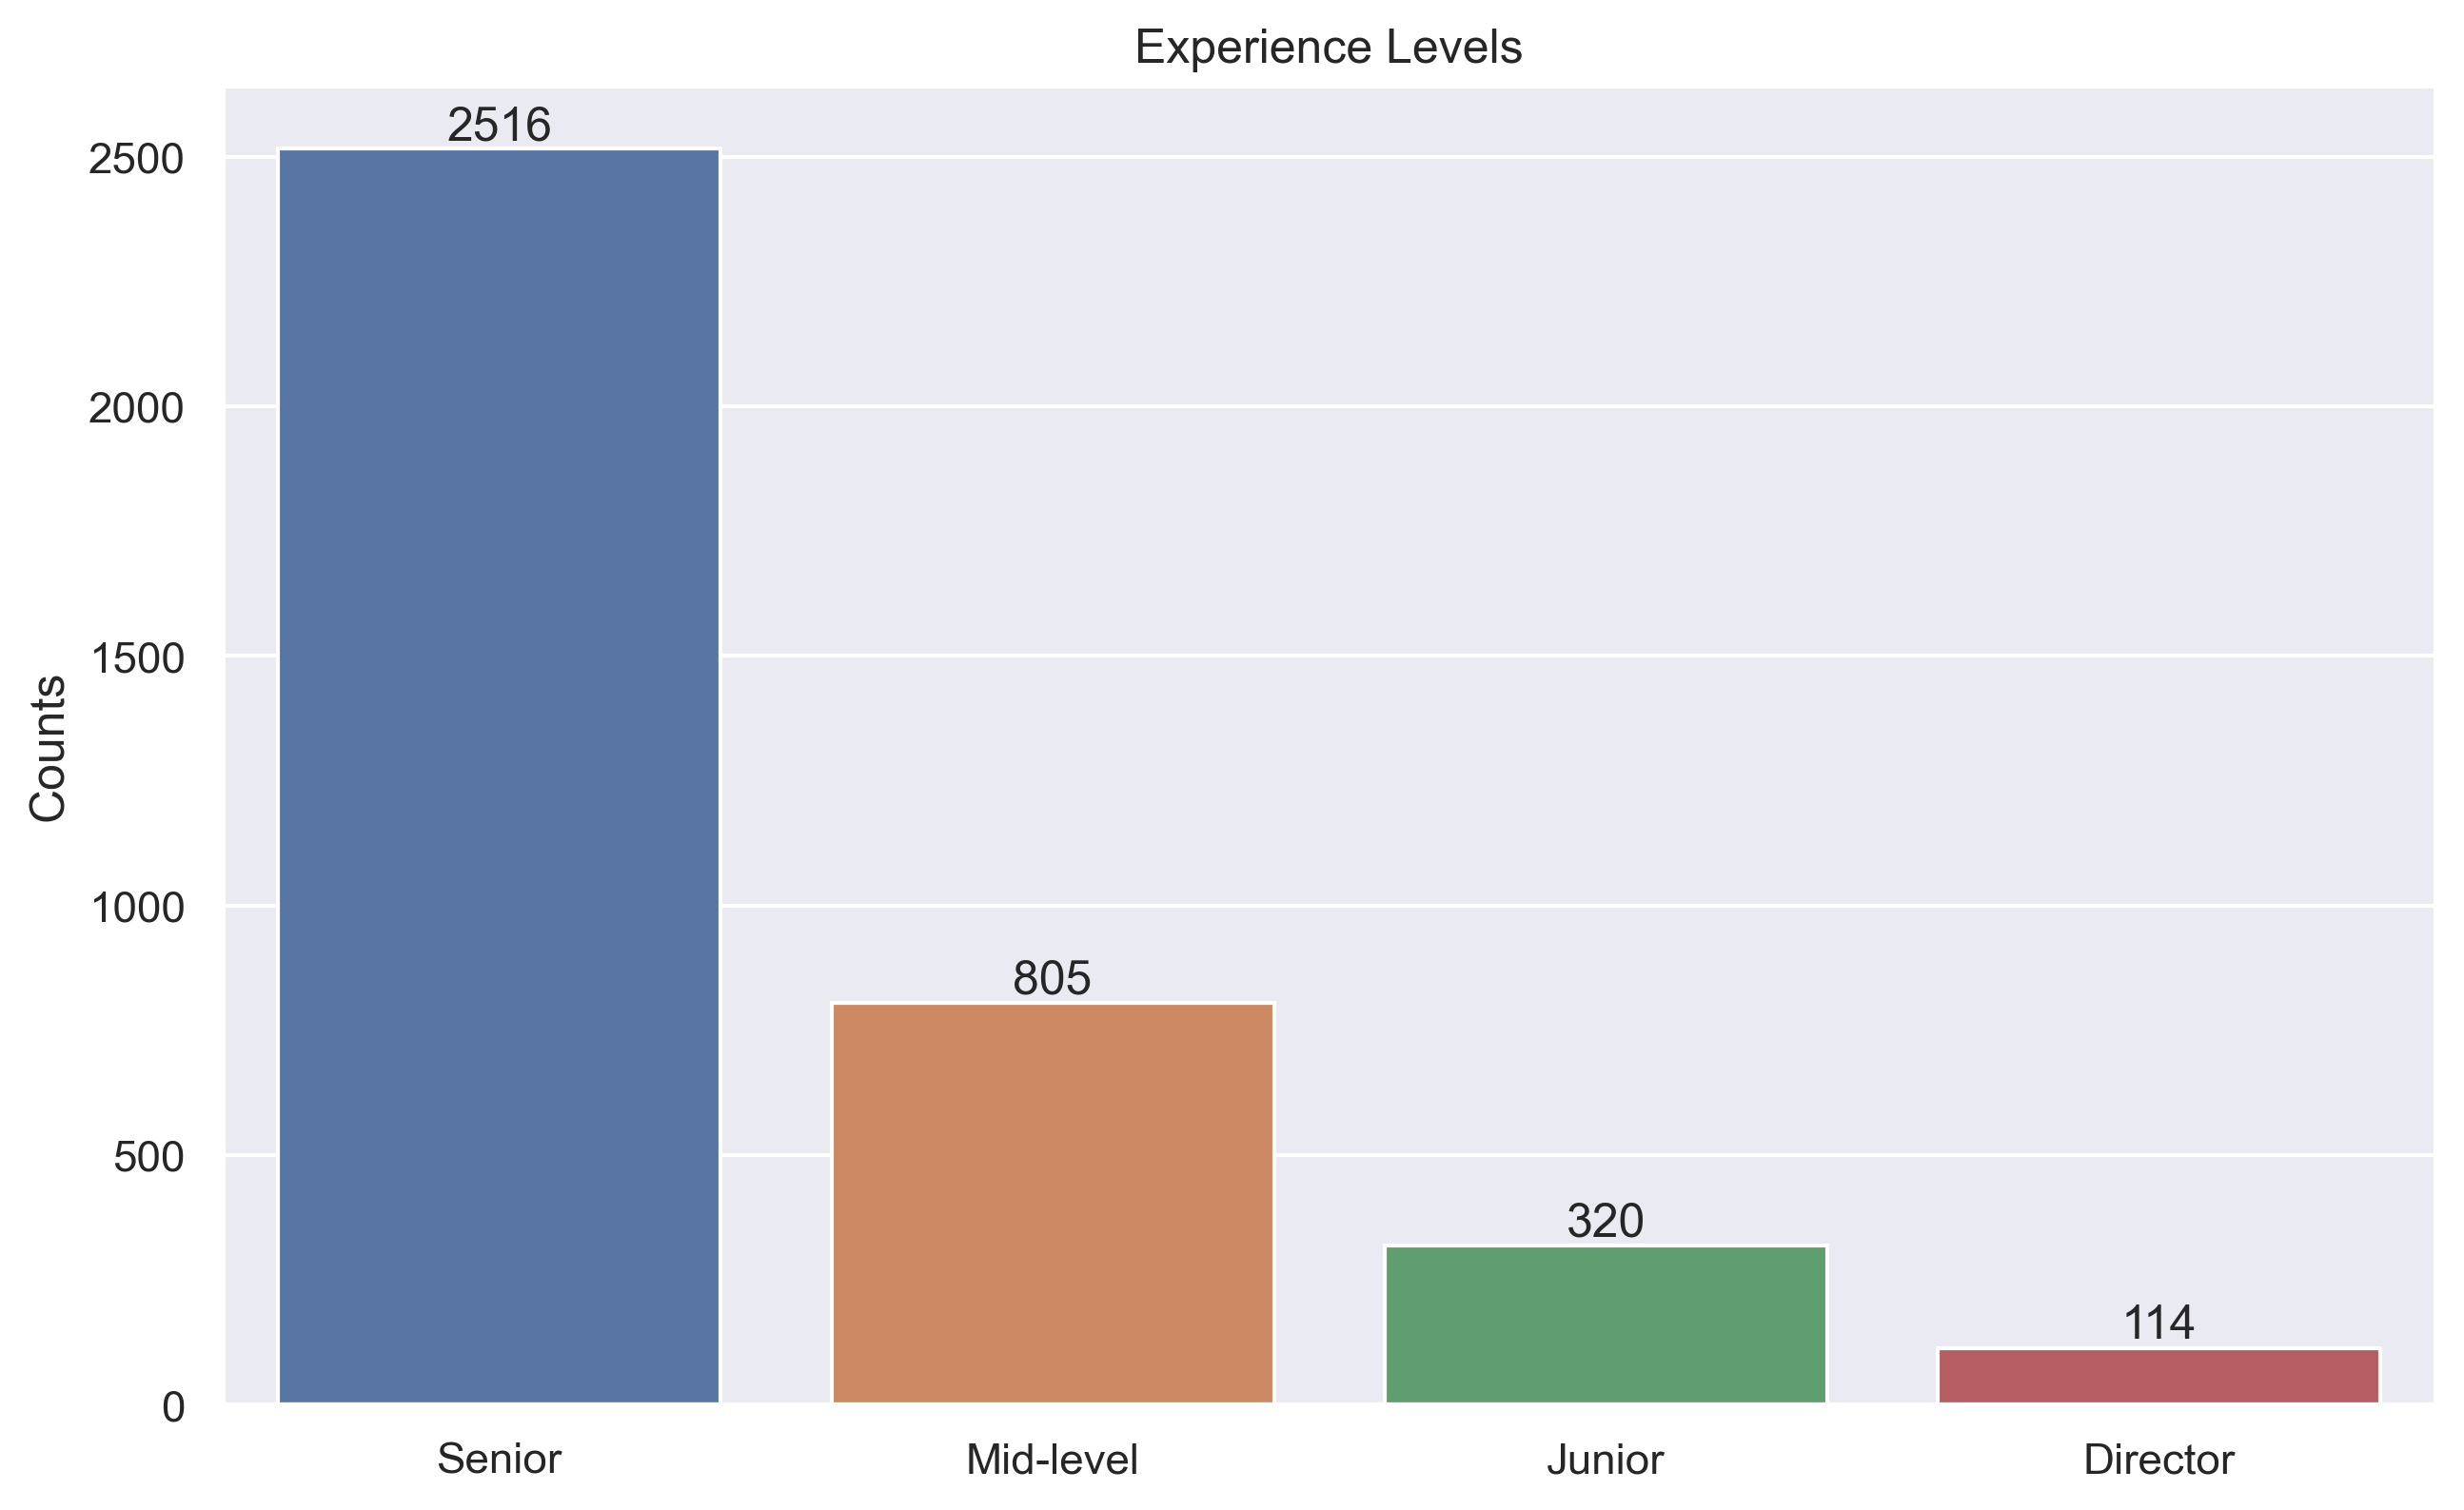

In [74]:
fig,ax=plt.subplots()
sns.countplot(ax=ax,data=df,x=df.experience_level)
ax.set(xlabel="",ylabel="Counts",title="Experience Levels")
ax.bar_label(ax.containers[0]);

In [76]:
df["employment_type"].unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

In [77]:
df["employment_type"] = df["employment_type"].replace("FT","Full Time")
df["employment_type"] = df["employment_type"].replace("CT","Contract")
df["employment_type"] = df["employment_type"].replace("FL","Freelance")
df["employment_type"] = df["employment_type"].replace("PT","Part Time")

In [78]:
df["employment_type"].unique()

array(['Full Time', 'Contact', 'Freelance', 'Part Time'], dtype=object)

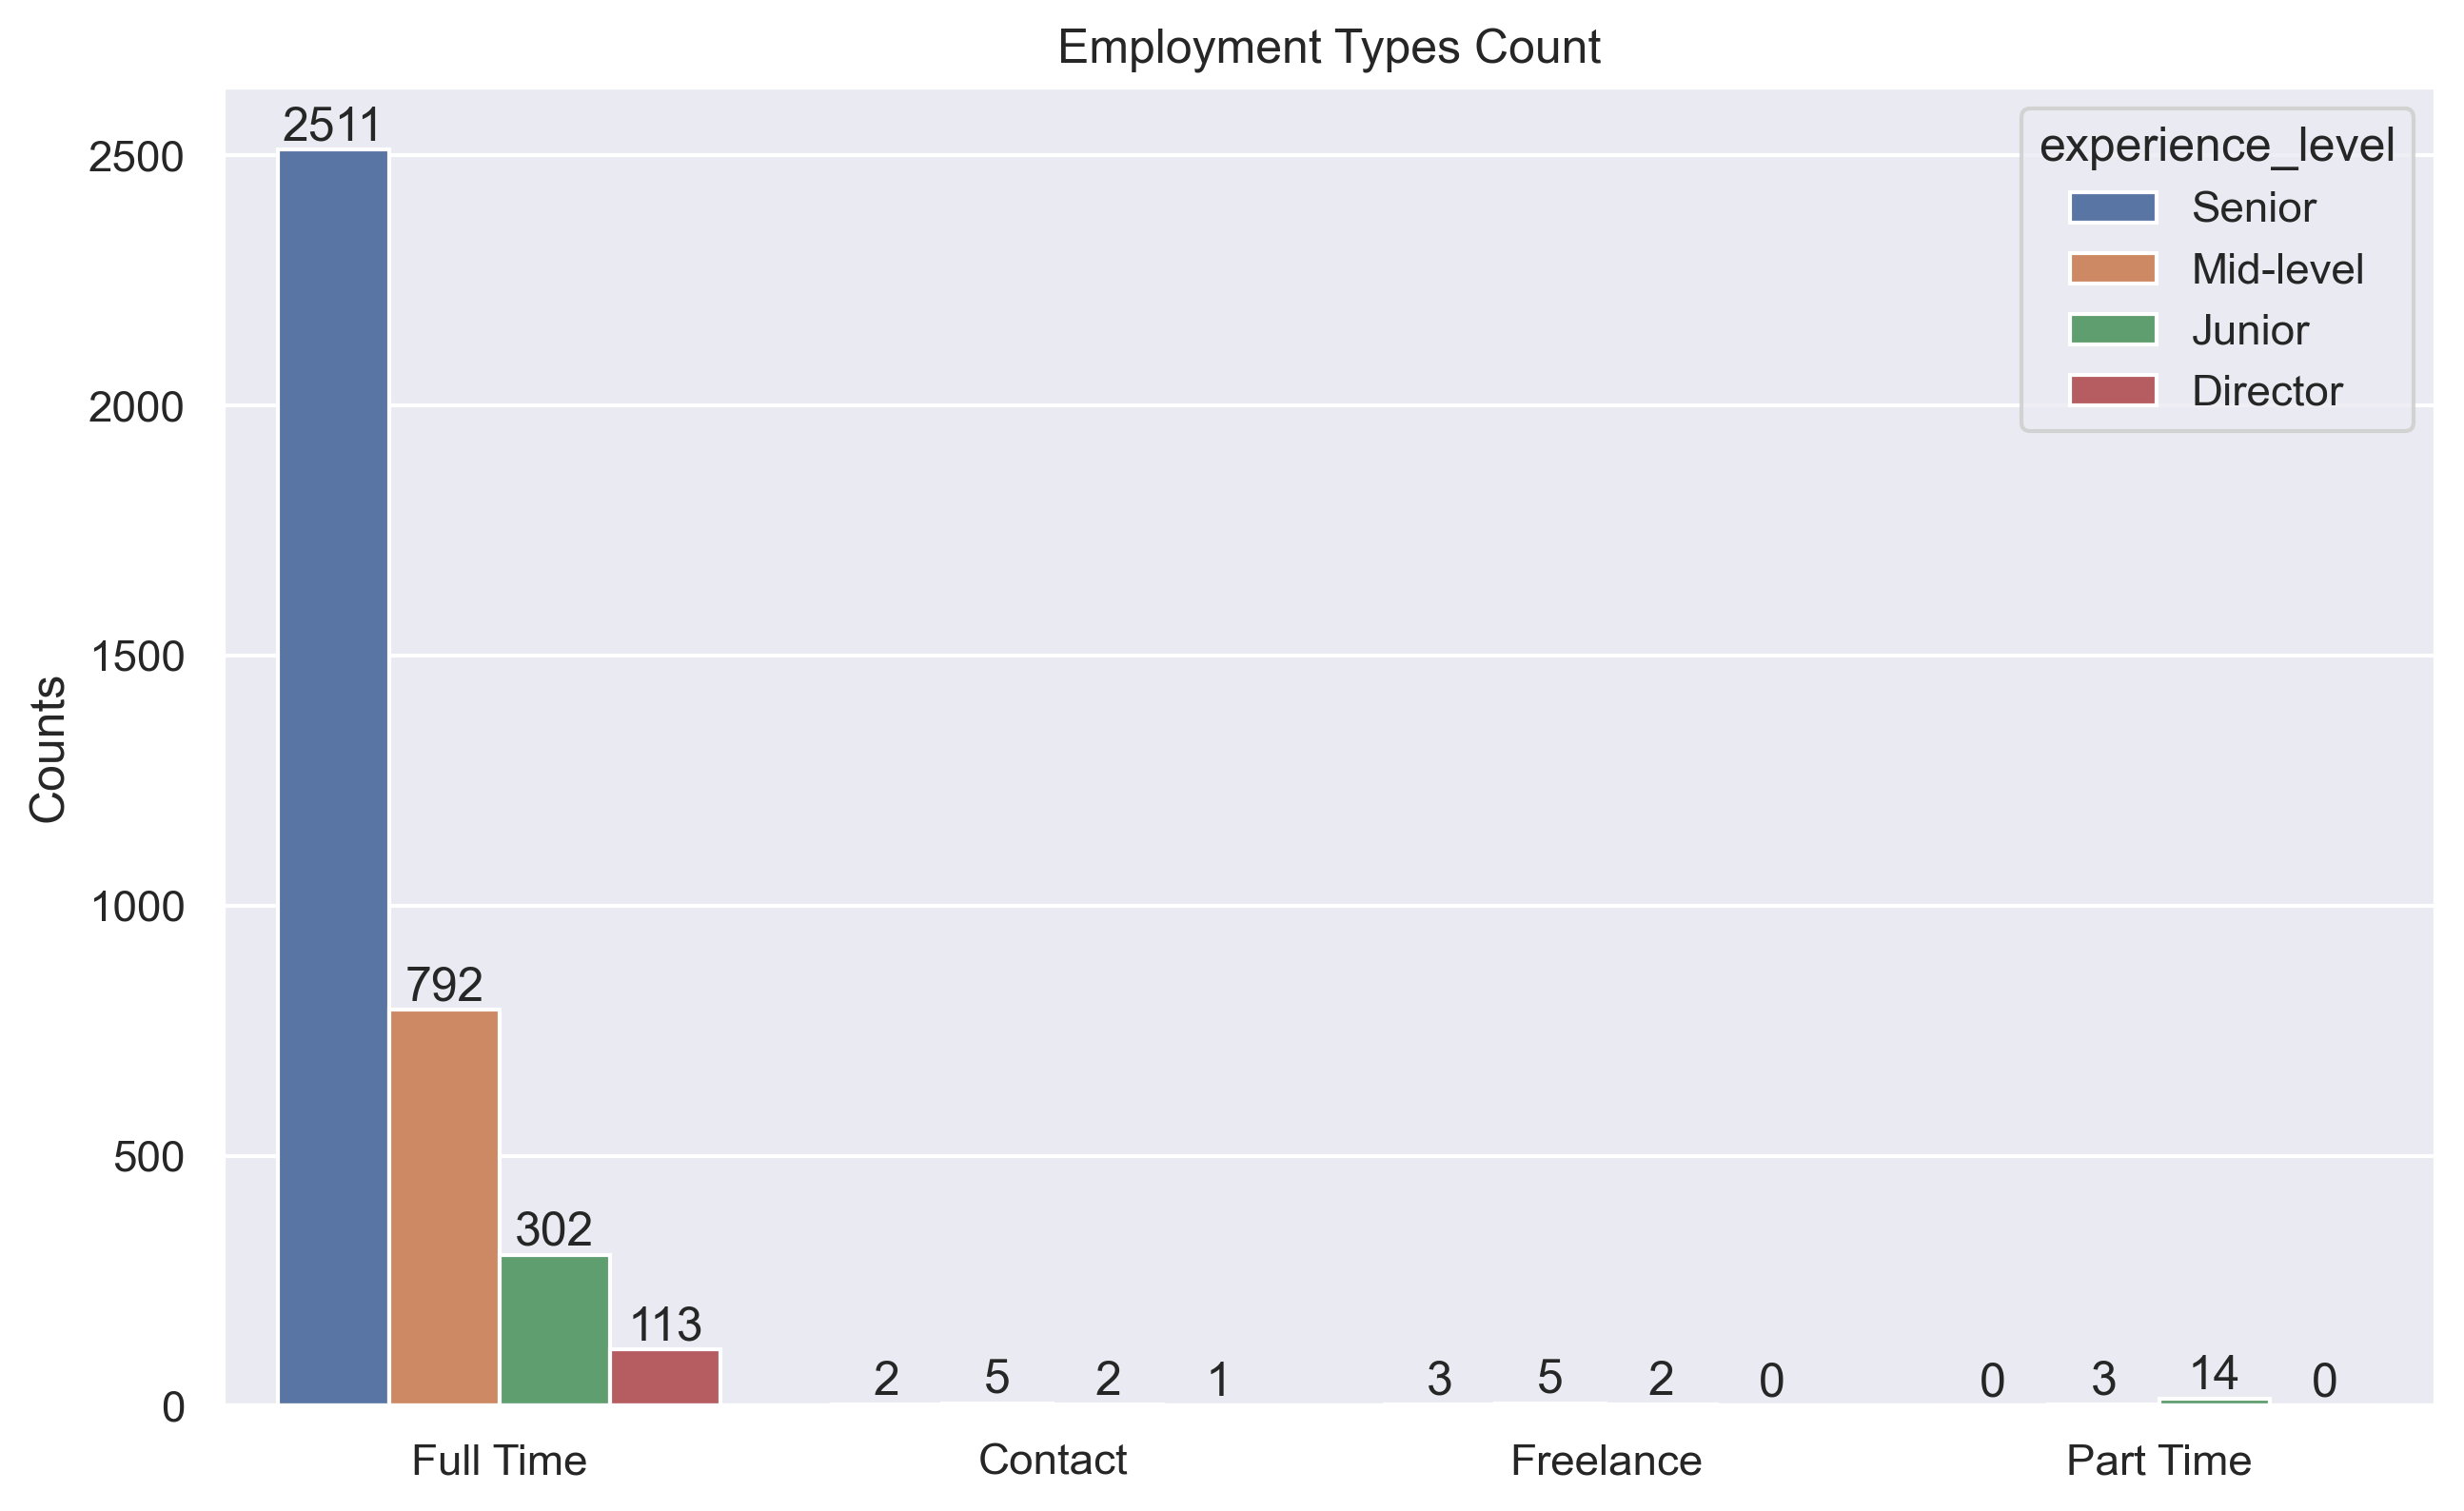

In [80]:
fig,ax=plt.subplots()
sns.countplot(ax=ax,data=df,x=df.employment_type,hue="experience_level")
ax.set(xlabel="",ylabel="Counts",title="Employment Types Count")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3]);

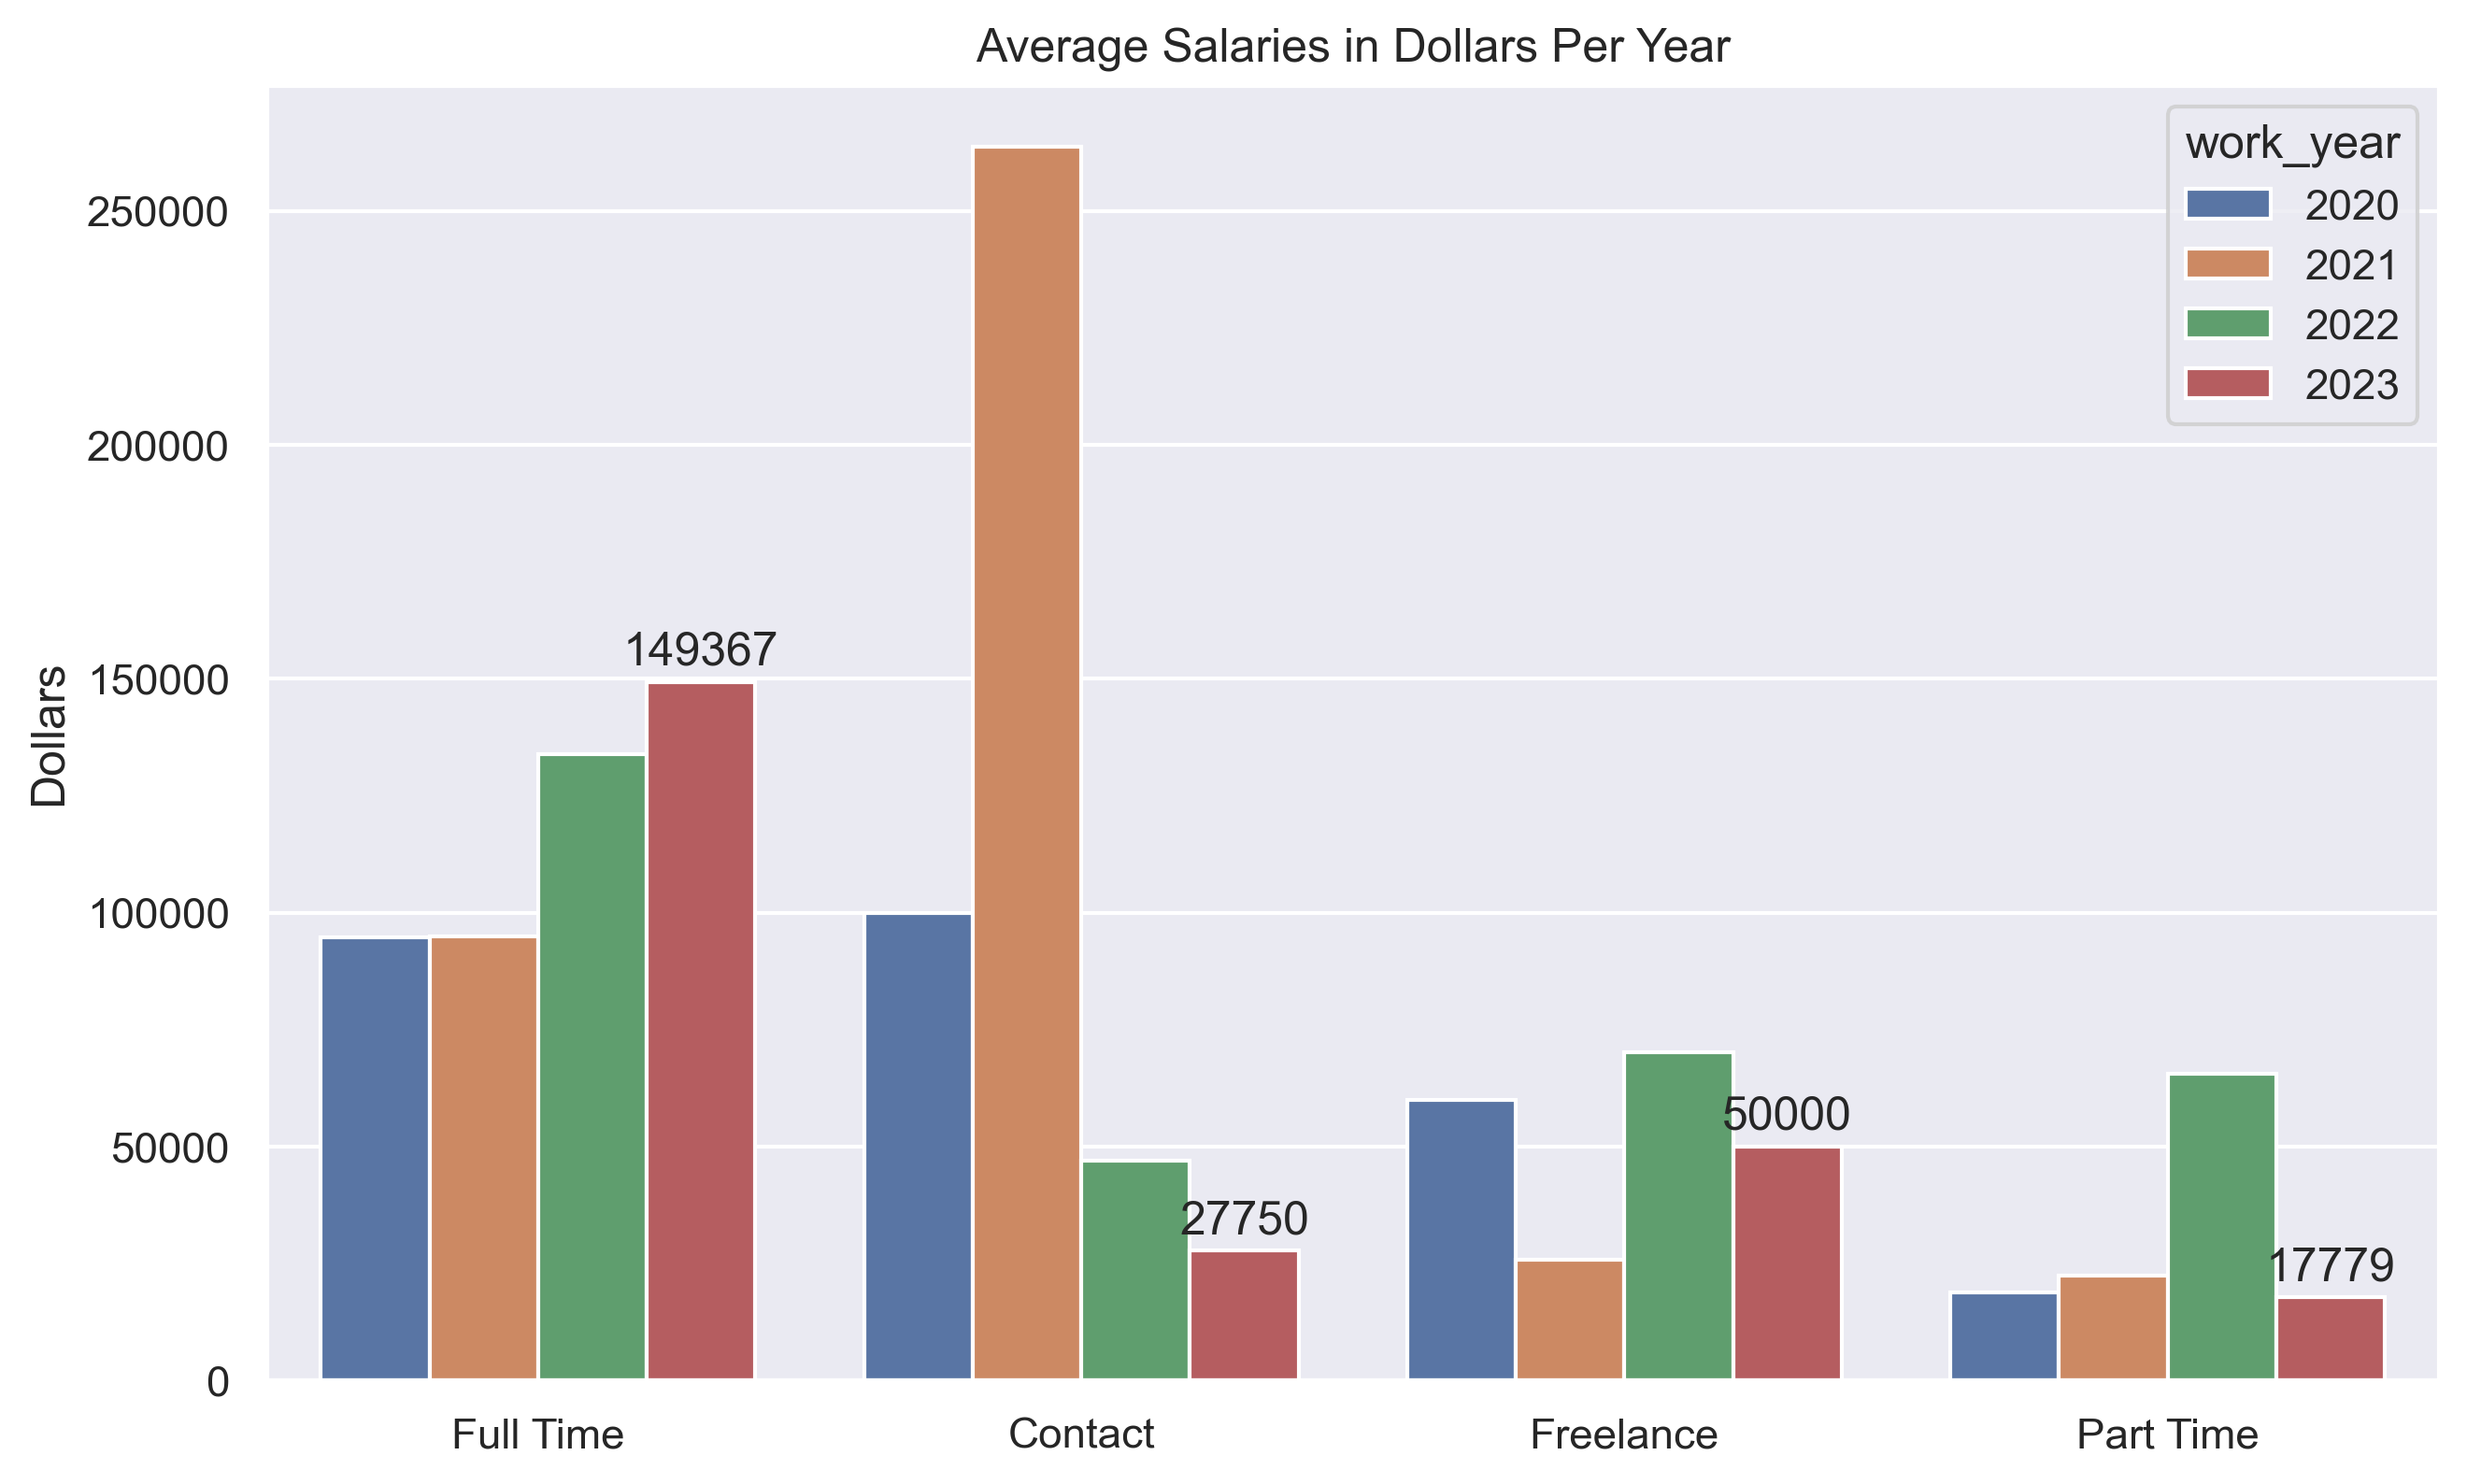

In [83]:
avg_salaries=df.groupby("employment_type")["salary_in_usd"].mean().round(0).sort_values(ascending=False).reset_index()
fig,ax=plt.subplots()
sns.barplot(ax=ax,data=df,x="employment_type",y="salary_in_usd",errorbar=None,hue="work_year")
ax.set(xlabel="",ylabel="Dollars",title="Average Salaries in Dollars Per Year")
ax.bar_label(ax.containers[3],padding=2);

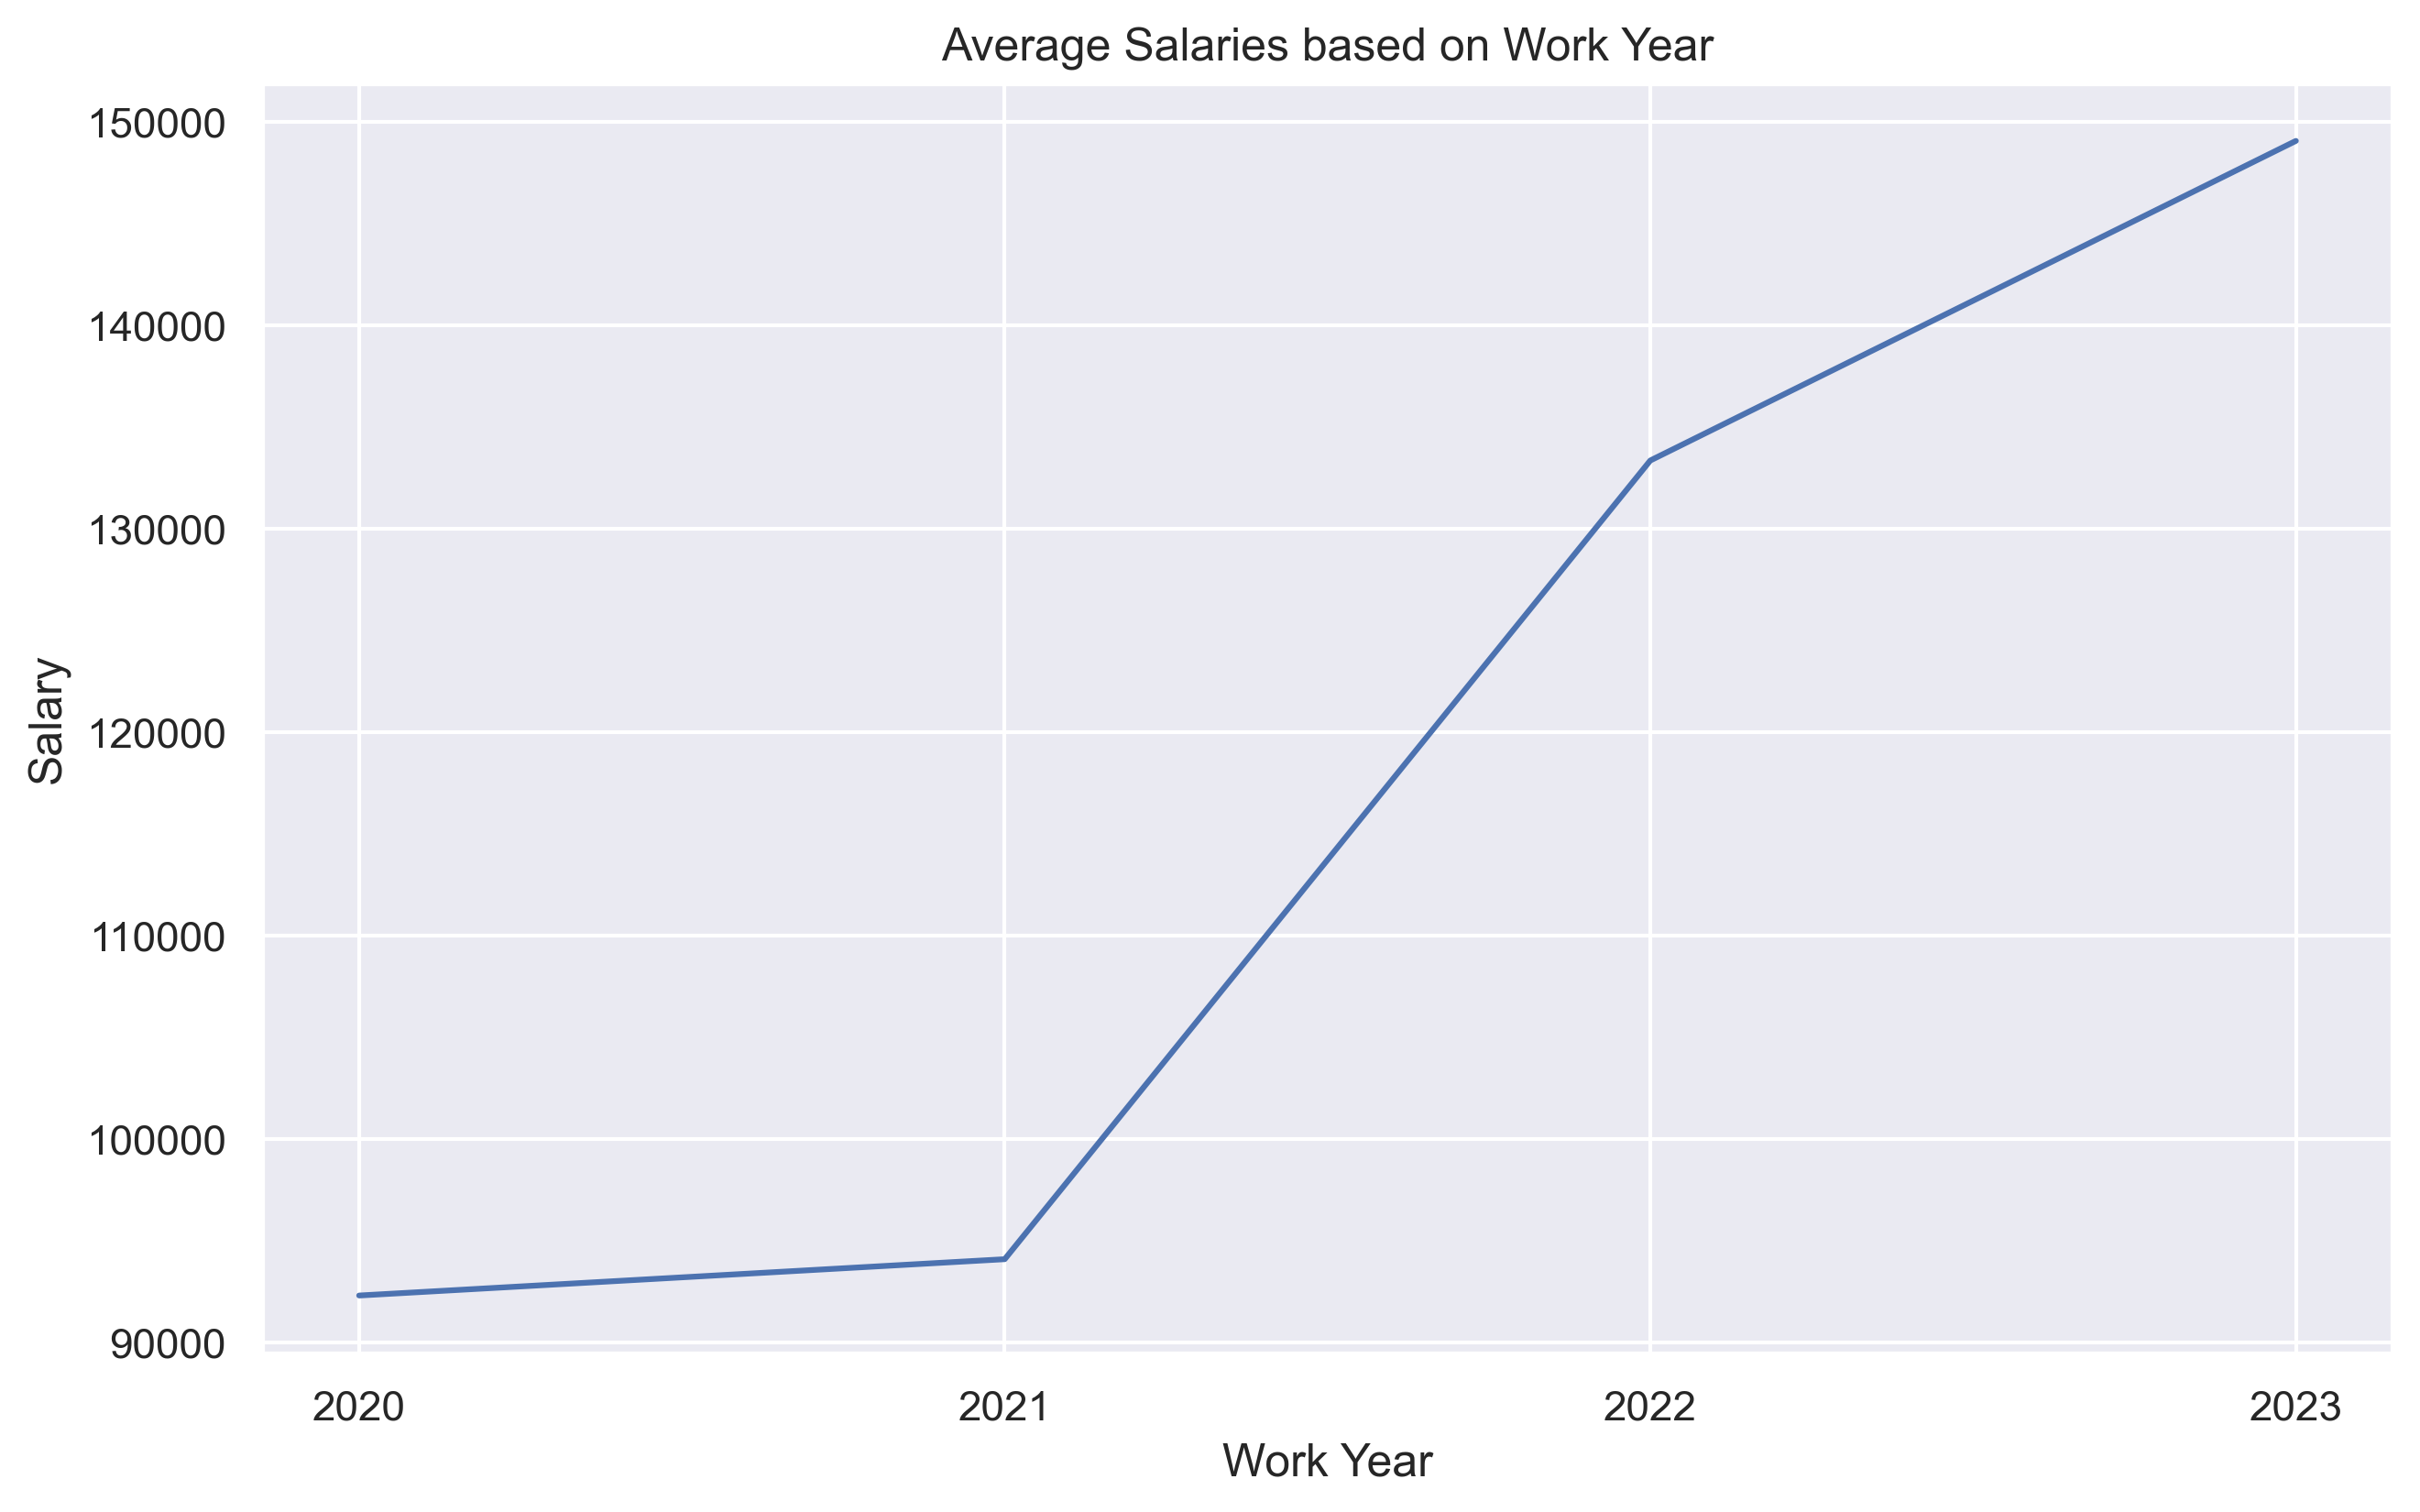

In [84]:
year_based_salary=df["salary_in_usd"].groupby(df["work_year"]).mean()
plt.title("Average Salaries based on Work Year")
plt.ylabel("Salary")
plt.xlabel("Work Year")
sns.lineplot(x=["2020","2021","2022","2023"],y=year_based_salary)
plt.show()

## Comparison of Data Scientist Salaries

Based on the analysis comparing data scientist salaries according to years, job positions, experience levels, and working hours, the following results were obtained:

In the year 2023, the fields in the data science domain that provide the most employment opportunities are data engineering, data scientist, and data analyst, in that order. This indicates that data engineering is the most in-demand field in the data science domain.

When we looked at the employment of data scientists based on their experience levels, it was observed that senior employees constitute nearly two-thirds of the sector. The majority of employees in companies hold senior positions.

In terms of working hours, it was observed that full-time employment is generally preferred in the data science field, while other working arrangements are rarely used.

By evaluating salaries according to working arrangements and years, it was found that data scientists working under contract employment in the year 2021 had considerably higher salaries compared to other periods. It is highly likely that in 2021, there was a significant demand in the sector, leading data scientists to work on multiple projects under contract employment with higher remuneration. However, in the following years, as this demand was recognized, people started focusing on entering the data science field, leading to a more balanced workforce. Consequently, in 2023, the majority of the highest-paying positions were occupied by full-time employees.

When examining the line graph, it is evident that data scientist salaries experienced a significant increase from 2021 to 2022 due to the demand, but over time, the rate of increase slowed down, signifying a gradual stabilization of the sector.

In conclusion, a closer examination of the graphs reveals that data scientist salaries started to rise significantly from 2021 with an upward trend expected to continue in the coming years. Additionally, data engineering emerged as the most sought-after field in the data science domain, with senior employees being the most hired. Full-time employment is widely preferred in the sector.

## Veri Bilimci Maaşlarının Karşılaştırılması

Veri bilimci maaşlarının yıllara, işlere, deneyime ve çalışma saatlerine göre karşılaştırılması analizi sonucunda elde edilen sonuçlar şu şekildedir:

2023 yılında veri bilimi alanında en çok istihdam sağlayan alanlar, sırasıyla, data engineering, data scientist ve data analyst olarak belirlenmiştir. Bu durum, veri bilimi alanında en çok ihtiyaç duyulan alanın data engineering olduğunu göstermektedir.

Veri bilimi alanında çalışanların deneyim düzeyine göre işe alımlarına bakıldığında, senior çalışanların sektörün neredeyse üçte ikisini oluşturduğu tespit edilmiştir. Şirketlerdeki çoğunluğu senior çalışanlar oluşturmaktadır.

Çalışma tipine göre bakıldığında, veri bilimi alanında genellikle full-time çalışma biçiminin tercih edildiği, diğer çalışma biçimlerinin ise nadiren kullanıldığı gözlemlenmiştir.

Çalışma tiplerine ve yıllara göre maaşları değerlendirdiğimizde, 2021 yılında contract çalışma tipindeki veri bilimci maaşlarının sektörün diğer dönemlere göre oldukça yüksek olduğu tespit edilmiştir. Büyük bir olasılıkla 2021 yılında sektörde ciddi bir ihtiyaç doğmuş ve bu ihtiyacı karşılayamayan veri bilimciler, contract çalışma biçiminde birden fazla işte yüksek ücretle çalışmaya başlamıştır. Daha sonraki yıllarda ise bu ihtiyacın fark edilmesiyle birlikte, insanlar veri bilimi alanına yönelerek sektörü dengelenmeye başlamıştır ve 2023 yılında çalışma tipine göre en çok maaş alanlar full-time çalışanlar olmuştur.

Çizgi grafiğine bakıldığında, 2021 yılından 2022 yılına geçerken ihtiyaçtan doğan veri bilimci maaşlarının ciddi bir artış gösterdiği, ancak zamanla artış hızının azaldığı ve sektörün yavaş yavaş dengeye geldiği düşünülmektedir.

Genel olarak, grafikler incelendiğinde veri bilimi alanındaki maaşların 2021 yılında başlayan bir ivmeyle artışa geçtiği ve ilerleyen dönemlerde artışın devam edeceği düşünülmektedir. Ayrıca, veri bilimi alanında en çok ihtiyaç duyulan alanın data engineering olduğu ve en çok işe alınanların senior çalışanlar olduğu belirlenmiştir. Çalışma tipi olarak ise sektörde full-time çalışmanın yaygın olarak tercih edildiği gözlemlenmiştir.